<a href="https://colab.research.google.com/github/eversonmariano/Analise-de-Dados_Machine-learning/blob/main/financas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Risco de ações

## Importação das bibliotecas e base de dados

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
dataset = pd.read_csv('acoes.csv')
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.990000,15.20,11.846200,0.232812,35.732101,47.259998
1,2015-01-05,14.850000,15.00,11.926900,0.237187,34.634201,46.320000
2,2015-01-06,15.210000,14.80,11.750000,0.234062,32.468300,46.580002
3,2015-01-07,14.550000,14.67,11.615400,0.241875,32.238701,48.150002
4,2015-01-08,14.270000,14.15,11.811500,0.240000,32.987301,48.509998
...,...,...,...,...,...,...,...
1441,2020-10-27,18.600000,14.17,83.239998,25.450001,28.500000,95.800003
1442,2020-10-28,16.920000,12.77,79.139999,24.629999,27.500000,92.430000
1443,2020-10-29,16.610001,12.68,80.029999,25.360001,28.500000,92.910004
1444,2020-10-30,15.690000,12.28,75.830002,24.629999,27.000000,90.660004


In [ ]:
dataset.describe()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
count,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000
mean,14.571473,32.860445,20.920034,4.634487,34.619463,71.770643
std,10.244303,16.118635,14.155955,6.023464,11.576407,19.913738
min,1.160000,6.490000,9.884610,0.030585,17.260000,36.450001
25%,6.635000,18.140224,12.640425,0.192734,28.196400,53.742500
50%,11.755000,29.105000,16.808849,2.315625,30.961201,71.090000
75%,20.355000,48.485000,19.480000,5.811485,36.226201,90.647503
max,43.790001,64.800003,83.550003,26.219999,83.720001,115.209999


# ---

## Cálculo dos retornos anuais

## Cálculos com todas as ações - risco médio anual

In [ ]:
dataset.drop(labels = ['Date'], axis=1, inplace=True)
dataset

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,14.990000,15.20,11.846200,0.232812,35.732101,47.259998
1,14.850000,15.00,11.926900,0.237187,34.634201,46.320000
2,15.210000,14.80,11.750000,0.234062,32.468300,46.580002
3,14.550000,14.67,11.615400,0.241875,32.238701,48.150002
4,14.270000,14.15,11.811500,0.240000,32.987301,48.509998
...,...,...,...,...,...,...
1441,18.600000,14.17,83.239998,25.450001,28.500000,95.800003
1442,16.920000,12.77,79.139999,24.629999,27.500000,92.430000
1443,16.610001,12.68,80.029999,25.360001,28.500000,92.910004
1444,15.690000,12.28,75.830002,24.629999,27.000000,90.660004


In [ ]:
taxas_retorno = (dataset / dataset.shift(1)) - 1
taxas_retorno

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.009340,-0.013158,0.006812,0.018792,-0.030726,-0.019890
2,0.024242,-0.013333,-0.014832,-0.013175,-0.062536,0.005613
3,-0.043392,-0.008784,-0.011455,0.033380,-0.007071,0.033705
4,-0.019244,-0.035447,0.016883,-0.007752,0.023221,0.007477
...,...,...,...,...,...,...
1441,-0.018987,-0.018018,0.005921,-0.000785,0.008136,-0.010024
1442,-0.090323,-0.098800,-0.049255,-0.032220,-0.035088,-0.035177
1443,-0.018321,-0.007048,0.011246,0.029639,0.036364,0.005193
1444,-0.055388,-0.031546,-0.052480,-0.028786,-0.052632,-0.024217


In [ ]:
taxas_retorno.std() * 100

GOL     5.159740
CVC     3.468112
WEGE    2.217699
MGLU    4.222228
TOTS    2.997335
BOVA    1.730331
dtype: float64

In [ ]:
taxas_retorno.std() * 246  #taxa de retorno anual

GOL     12.692961
CVC      8.531555
WEGE     5.455540
MGLU    10.386681
TOTS     7.373443
BOVA     4.256615
dtype: float64

In [ ]:
math.sqrt(246) # Anualizar

15.684387141358123

In [ ]:
taxas_retorno.std() * math.sqrt(246) #taxa de retorno anual

GOL     0.809274
CVC     0.543952
WEGE    0.347833
MGLU    0.662231
TOTS    0.470114
BOVA    0.271392
dtype: float64

## Correlação entre ações

In [ ]:
dataset

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,14.990000,15.20,11.846200,0.232812,35.732101,47.259998
1,14.850000,15.00,11.926900,0.237187,34.634201,46.320000
2,15.210000,14.80,11.750000,0.234062,32.468300,46.580002
3,14.550000,14.67,11.615400,0.241875,32.238701,48.150002
4,14.270000,14.15,11.811500,0.240000,32.987301,48.509998
...,...,...,...,...,...,...
1441,18.600000,14.17,83.239998,25.450001,28.500000,95.800003
1442,16.920000,12.77,79.139999,24.629999,27.500000,92.430000
1443,16.610001,12.68,80.029999,25.360001,28.500000,92.910004
1444,15.690000,12.28,75.830002,24.629999,27.000000,90.660004


In [ ]:
taxas_retorno

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.009340,-0.013158,0.006812,0.018792,-0.030726,-0.019890
2,0.024242,-0.013333,-0.014832,-0.013175,-0.062536,0.005613
3,-0.043392,-0.008784,-0.011455,0.033380,-0.007071,0.033705
4,-0.019244,-0.035447,0.016883,-0.007752,0.023221,0.007477
...,...,...,...,...,...,...
1441,-0.018987,-0.018018,0.005921,-0.000785,0.008136,-0.010024
1442,-0.090323,-0.098800,-0.049255,-0.032220,-0.035088,-0.035177
1443,-0.018321,-0.007048,0.011246,0.029639,0.036364,0.005193
1444,-0.055388,-0.031546,-0.052480,-0.028786,-0.052632,-0.024217


In [ ]:
taxas_retorno.cov()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
GOL,0.002662,0.000895,0.000366,0.000710,0.000401,0.000528
CVC,0.000895,0.001203,0.000241,0.000479,0.000274,0.000336
WEGE,0.000366,0.000241,0.000492,0.000276,0.000199,0.000207
MGLU,0.000710,0.000479,0.000276,0.001783,0.000252,0.000335
TOTS,0.000401,0.000274,0.000199,0.000252,0.000898,0.000211
BOVA,0.000528,0.000336,0.000207,0.000335,0.000211,0.000299


In [ ]:
# Empresas BOVA: http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraQuadrimestre.aspx?Indice=IBOV&idioma=pt-br
taxas_retorno.corr()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
GOL,1.000000,0.499884,0.319979,0.325900,0.259048,0.590888
CVC,0.499884,1.000000,0.313461,0.327040,0.263111,0.560705
WEGE,0.319979,0.313461,1.000000,0.295261,0.299640,0.539577
MGLU,0.325900,0.327040,0.295261,1.000000,0.199397,0.458245
TOTS,0.259048,0.263111,0.299640,0.199397,1.000000,0.407193
BOVA,0.590888,0.560705,0.539577,0.458245,0.407193,1.000000


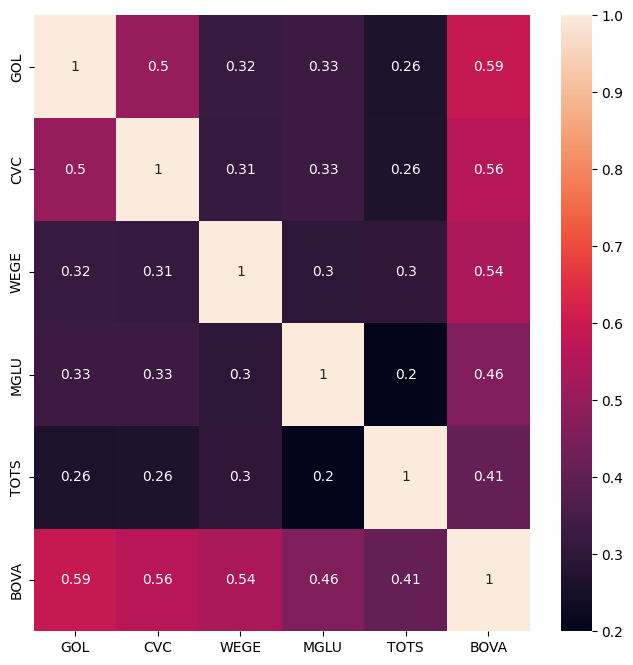

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(taxas_retorno.corr(), annot=True);

## Risco de um portfólio

### Todas as ações

In [ ]:
dataset.columns

Index(['GOL', 'CVC', 'WEGE', 'MGLU', 'TOTS', 'BOVA'], dtype='object')

In [ ]:
pesos1 = np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0.0])

In [ ]:
pesos1.sum()

1.0

In [ ]:
taxas_retorno.cov() * 246

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
GOL,0.654924,0.220052,0.090071,0.174658,0.098555,0.129777
CVC,0.220052,0.295884,0.059308,0.117807,0.067282,0.082774
WEGE,0.090071,0.059308,0.120987,0.068012,0.048997,0.050935
MGLU,0.174658,0.117807,0.068012,0.438549,0.062077,0.082358
TOTS,0.098555,0.067282,0.048997,0.062077,0.221007,0.051952
BOVA,0.129777,0.082774,0.050935,0.082358,0.051952,0.073654


In [ ]:
np.dot(taxas_retorno.cov() * 246, pesos1)

array([0.24765205, 0.15206665, 0.0774753 , 0.17222065, 0.09958374,
       0.07955904])

In [ ]:
variancia_portfolio1 = np.dot(pesos1, np.dot(taxas_retorno.cov() * 246, pesos1))
variancia_portfolio1

0.14979967843761446

In [ ]:
volatilidade_portfolio1 = math.sqrt(variancia_portfolio1)
volatilidade_portfolio1

0.38703963419476106

In [ ]:
pesos2 = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 1.0])

In [ ]:
variancia_portfolio2 = np.dot(pesos2, np.dot(taxas_retorno.cov() * 246, pesos2))
variancia_portfolio2

0.07365354752228817

In [ ]:
volatilidade_portfolio2 = math.sqrt(variancia_portfolio2)
volatilidade_portfolio2

0.27139187077414123

## Risco sistemático e não sistemático

- Risco sistemático: mudança diária no preço das ações, devido a eventos como recessão da economia, comportamento do cliente (eventos externos). Não pode ser eliminado e pode afetar todas as empresas
- Risco não sistemático: Eventos específicos na empresa (depende do tipo de empresa)

In [ ]:
taxas_retorno

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.009340,-0.013158,0.006812,0.018792,-0.030726,-0.019890
2,0.024242,-0.013333,-0.014832,-0.013175,-0.062536,0.005613
3,-0.043392,-0.008784,-0.011455,0.033380,-0.007071,0.033705
4,-0.019244,-0.035447,0.016883,-0.007752,0.023221,0.007477
...,...,...,...,...,...,...
1441,-0.018987,-0.018018,0.005921,-0.000785,0.008136,-0.010024
1442,-0.090323,-0.098800,-0.049255,-0.032220,-0.035088,-0.035177
1443,-0.018321,-0.007048,0.011246,0.029639,0.036364,0.005193
1444,-0.055388,-0.031546,-0.052480,-0.028786,-0.052632,-0.024217


In [ ]:
pesos1

array([0.2, 0.2, 0.2, 0.2, 0.2, 0. ])

In [ ]:
pesos2

array([0., 0., 0., 0., 0., 1.])

In [ ]:
taxas_retorno.var() * 246

GOL     0.654924
CVC     0.295884
WEGE    0.120987
MGLU    0.438549
TOTS    0.221007
BOVA    0.073654
dtype: float64

In [ ]:
variancia_pesos1 = (taxas_retorno.var() * 246) * pesos1
variancia_pesos1

GOL     0.130985
CVC     0.059177
WEGE    0.024197
MGLU    0.087710
TOTS    0.044201
BOVA    0.000000
dtype: float64

In [ ]:
sub1 = - variancia_pesos1[0] - variancia_pesos1[1] - variancia_pesos1[2] - variancia_pesos1[3] - variancia_pesos1[4] - variancia_pesos1[5]
sub1

-0.3462702545978207

In [ ]:
variancia_portfolio1

0.14979967843761446

In [ ]:
risco_nao_sistematico1 = (variancia_portfolio1 - sub1)
risco_nao_sistematico1

0.4960699330354351

In [ ]:
variancia_pesos2 = (taxas_retorno.var() * 246) * pesos2
variancia_pesos2

GOL     0.000000
CVC     0.000000
WEGE    0.000000
MGLU    0.000000
TOTS    0.000000
BOVA    0.073654
dtype: float64

In [ ]:
sub2 = variancia_pesos2[0] - variancia_pesos2[1] - variancia_pesos2[2] - variancia_pesos2[3] - variancia_pesos2[4] - variancia_pesos2[5]
sub2

-0.07365354752228812

In [ ]:
variancia_portfolio2

0.07365354752228817

In [ ]:
risco_nao_sistematico2 = (variancia_portfolio2 - sub2)
risco_nao_sistematico2

0.14730709504457629

## Alocação aleatória de ativos

In [ ]:
len(dataset.columns) - 1

5

In [ ]:
dataset.loc[len(dataset) - 1]['BOVA']

92.41000366210938

In [ ]:
# Essa função gera uma tabela com pesos aleatórios e uma taxa de retorno se tivessemos uma determinada quantia para investimento em cada ação
def alocacao_ativos(dataset, dinheiro_total, seed = 0, melhores_pesos = []):
  dataset = dataset.copy()

  if seed != 0:
    np.random.seed(seed)

  if len(melhores_pesos) > 0:
    pesos = melhores_pesos
  else:
    pesos = np.random.random(len(dataset.columns) - 1)
    #print(pesos, pesos.sum())
    pesos = pesos / pesos.sum()
    #print(pesos, pesos.sum())

  colunas = dataset.columns[1:]
  #print(colunas)
  for i in colunas:
    dataset[i] = (dataset[i] / dataset[i][0])

  for i, acao in enumerate(dataset.columns[1:]):
    #print(i, acao)
    dataset[acao] = dataset[acao] * pesos[i] * dinheiro_total

  dataset['soma valor'] = dataset.sum(axis = 1)

  datas = dataset['Date']
  #print(datas)

  dataset.drop(labels = ['Date'], axis = 1, inplace = True)
  dataset['taxa retorno'] = 0.0

  for i in range(1, len(dataset)):
    dataset['taxa retorno'][i] = ((dataset['soma valor'][i] / dataset['soma valor'][i - 1]) - 1) * 100

  acoes_pesos = pd.DataFrame(data = {'Ações': colunas, 'Pesos': pesos * 100})

  return dataset, datas, acoes_pesos, dataset.loc[len(dataset) - 1]['soma valor']

In [ ]:
dataset, datas, acoes_pesos, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 5000, 10)

<ipython-input-41-eb722fa69c4c>:25: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset['soma valor'] = dataset.sum(axis = 1)


In [ ]:
dataset

,GOL,CVC,WEGE,MGLU,TOTS,BOVA,soma valor,taxa retorno
0,1330.859777,35.806036,1093.315674,1292.008683,860.138954,387.870876,5000.000000,0.000000
1,1318.430187,35.334904,1100.763673,1316.288069,833.710425,380.156147,4984.683405,-0.306332
2,1350.392100,34.863773,1084.437134,1298.945650,781.573105,382.290029,4932.501791,-1.046839
3,1291.795217,34.557537,1072.014590,1342.304468,776.046225,395.175284,4911.893321,-0.417810
4,1266.935952,33.332592,1090.113087,1331.899017,794.066437,398.129839,4914.476924,0.052599
...,...,...,...,...,...,...,...,...
1441,1651.367094,33.379707,7682.429339,141236.798956,686.048657,786.246983,152076.270736,-0.066212
1442,1502.211333,30.081783,7304.030139,136686.134989,661.976774,758.588795,146943.023813,-3.375442
1443,1474.688596,29.869773,7386.170428,140737.335967,686.048657,762.528265,151076.641685,2.813075
1444,1393.007983,28.927508,6998.542117,136686.134989,649.940833,744.062131,146500.615560,-3.028944


In [ ]:
datas

0       2015-01-02
1       2015-01-05
2       2015-01-06
3       2015-01-07
4       2015-01-08
           ...    
1441    2020-10-27
1442    2020-10-28
1443    2020-10-29
1444    2020-10-30
1445    2020-11-03
Name: Date, Length: 1446, dtype: object

In [ ]:
#o percentual investido em cada ação
acoes_pesos

,Ações,Pesos
0,GOL,26.617196
1,CVC,0.716121
2,WEGE,21.866313
3,MGLU,25.840174
4,TOTS,17.202779
5,BOVA,7.757418


In [ ]:
#Somatório após os 6 anos
soma_valor

150607.25846015807

## Visualização dos dados

In [ ]:
import plotly.express as px
import yfinance as yf

In [ ]:
#Evolução da taxa de retorno

figura = px.line(x = datas, y = dataset['taxa retorno'], title = 'Retorno diário do portfólio')
figura.show()

In [ ]:
#Essa visualização é interessante para nos mostrar o quanto de dinheiro ganhariamos,
#caso tivessemos feito o investimento

figura = px.line(title = 'Evolução do patrimônio')
for i in dataset.drop(columns = ['soma valor', 'taxa retorno']).columns:
  figura.add_scatter(x = datas, y = dataset[i], name = i)
figura.show()

In [ ]:
#A evolução do total dos valor

figura = px.line(x = datas, y = dataset['soma valor'], title = 'Evolução do patrimônio')
figura.show()

## Mais cálculos no portfólio

### Retorno acumulado em todo o período

In [ ]:
dataset.loc[len(dataset) - 1]['soma valor'] / dataset.loc[0]['soma valor'] - 1

29.121451692031616

### Desvio padrão

In [ ]:
dataset['taxa retorno'].std()

2.8167443147613396

### Sharpe ratio

In [ ]:
(dataset['taxa retorno'].mean() / dataset['taxa retorno'].std()) * np.sqrt(246)

1.5341112767145646

In [ ]:
dinheiro_total = 5000

In [ ]:
#Calcula se tivemos lucro ou prejuizo, caso investissemos nessa carteira
soma_valor - dinheiro_total

145607.25846015807

In [ ]:
#Renda fixa
# Taxa selic: https://www.infomoney.com.br/guias/taxa-selic/
taxa_selic_2015 = 12.75
taxa_selic_2016 = 14.25
taxa_selic_2017 = 12.25
taxa_selic_2018 = 6.50
taxa_selic_2019 = 5.0
taxa_selic_2020 = 2.0

In [ ]:
valor_2015 = dinheiro_total + (dinheiro_total * taxa_selic_2015 / 100)
valor_2015

5637.5

In [ ]:
valor_2016 = valor_2015 + (valor_2015 * taxa_selic_2016 / 100)
valor_2016

6440.84375

In [ ]:
valor_2017 = valor_2016 + (valor_2016 * taxa_selic_2017 / 100)
valor_2017

7229.8471093749995

In [ ]:
valor_2018 = valor_2017 + (valor_2017 * taxa_selic_2018 / 100)
valor_2018

7699.787171484374

In [ ]:
valor_2019 = valor_2018 + (valor_2018 * taxa_selic_2019 / 100)
valor_2019

8084.7765300585925

In [ ]:
valor_2020 = valor_2019 + (valor_2019 * taxa_selic_2020 / 100)
valor_2020

8246.472060659764

In [ ]:
rendimentos = valor_2020 - dinheiro_total
rendimentos

3246.472060659764

In [ ]:
#descontando o imposto de renda
ir = rendimentos * 15 / 100
ir

486.9708090989646

In [ ]:
#ganho
valor_2020 - ir

7759.5012515608

In [ ]:
taxa_selic_historico = np.array([12.75, 14.25, 12.25, 6.5, 5.0, 2.0])
taxa_selic_historico.mean() / 100

0.08791666666666666

In [ ]:
(dataset['taxa retorno'].mean() - taxa_selic_historico.mean() / 100) / dataset['taxa retorno'].std() * np.sqrt(246)

1.0445677178791335

# Séries temporais em bases financeiras - ARIMA

## Instalação e importação das bibliotecas

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 30.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

## Carregamento da base de dados

In [ ]:
dateparse = lambda dates: datetime.datetime.strptime(dates, '%Y-%m-%d')
dataset = pd.read_csv('acoes.csv', parse_dates=['Date'], index_col='Date',
                      date_parser = dateparse, usecols = ['Date', 'BOVA'])

In [ ]:
dataset

,BOVA
Date,
2015-01-02,47.259998
2015-01-05,46.320000
2015-01-06,46.580002
2015-01-07,48.150002
2015-01-08,48.509998
...,...
2020-10-27,95.800003
2020-10-28,92.430000
2020-10-29,92.910004


In [ ]:
time_series = dataset['BOVA']

In [ ]:
time_series

Date
2015-01-02    47.259998
2015-01-05    46.320000
2015-01-06    46.580002
2015-01-07    48.150002
2015-01-08    48.509998
                ...    
2020-10-27    95.800003
2020-10-28    92.430000
2020-10-29    92.910004
2020-10-30    90.660004
2020-11-03    92.410004
Name: BOVA, Length: 1446, dtype: float64

## Exploração da série temporal

In [ ]:
time_series[1]

46.31999969482422

In [ ]:
time_series['2015-01-08']

48.5099983215332

In [ ]:
time_series['2015-01-01':'2015-01-10']

Date
2015-01-02    47.259998
2015-01-05    46.320000
2015-01-06    46.580002
2015-01-07    48.150002
2015-01-08    48.509998
2015-01-09    47.529999
Name: BOVA, dtype: float64

In [ ]:
time_series[:'2015-07-31']

Date
2015-01-02    47.259998
2015-01-05    46.320000
2015-01-06    46.580002
2015-01-07    48.150002
2015-01-08    48.509998
                ...    
2015-07-27    47.349998
2015-07-28    48.180000
2015-07-29    48.740002
2015-07-30    48.430000
2015-07-31    49.369999
Name: BOVA, Length: 144, dtype: float64

In [ ]:
time_series['2015']

Date
2015-01-02    47.259998
2015-01-05    46.320000
2015-01-06    46.580002
2015-01-07    48.150002
2015-01-08    48.509998
                ...    
2015-12-22    42.230000
2015-12-23    42.750000
2015-12-28    42.500000
2015-12-29    42.419998
2015-12-30    42.130001
Name: BOVA, Length: 246, dtype: float64

In [ ]:
time_series.index.max()

Timestamp('2020-11-03 00:00:00')

In [ ]:
time_series.index.min()

Timestamp('2015-01-02 00:00:00')

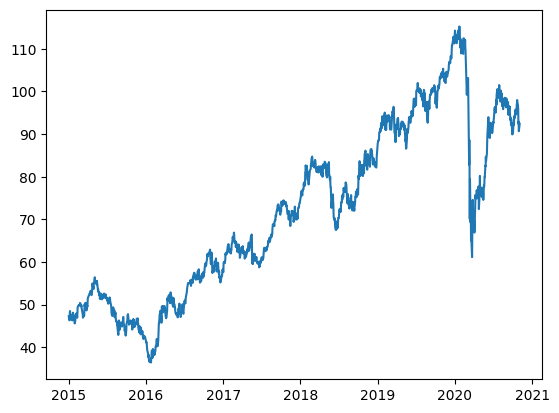

In [ ]:
plt.plot(time_series);

In [ ]:
figura = px.line(title='Histórico do preço das ações')
figura.add_scatter(x = time_series.index, y = time_series)

In [ ]:
time_series_datas = time_series['2015-01-01':'2015-12-31']

In [ ]:
time_series_datas

Date
2015-01-02    47.259998
2015-01-05    46.320000
2015-01-06    46.580002
2015-01-07    48.150002
2015-01-08    48.509998
                ...    
2015-12-22    42.230000
2015-12-23    42.750000
2015-12-28    42.500000
2015-12-29    42.419998
2015-12-30    42.130001
Name: BOVA, Length: 246, dtype: float64

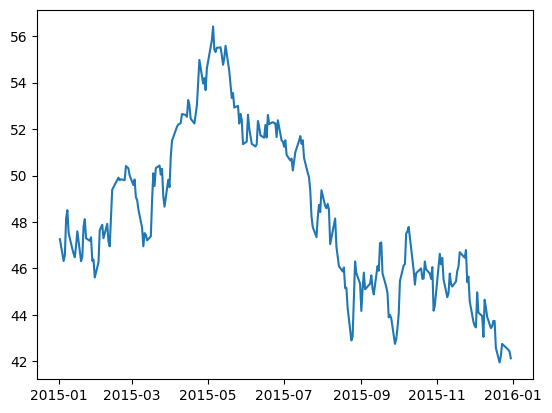

In [ ]:
plt.plot(time_series_datas);

## Decomposição da série temporal

In [ ]:
type(time_series)

pandas.core.series.Series

In [ ]:
len(time_series) / 2

723.0

In [ ]:
decomposicao = seasonal_decompose(time_series, period=len(time_series) // 2)

In [ ]:
tendencia = decomposicao.trend
sazonal = decomposicao.seasonal
aleatorio = decomposicao.resid

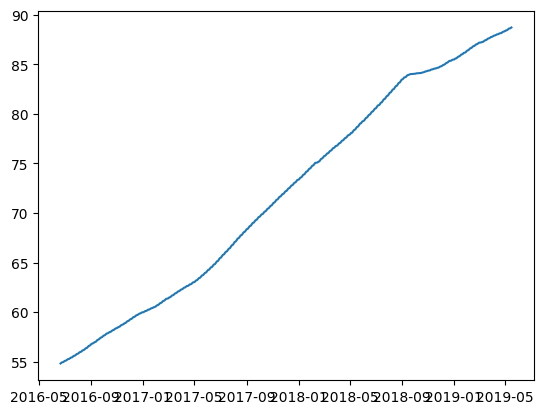

In [ ]:
#a tendencia desta ação
plt.plot(tendencia);

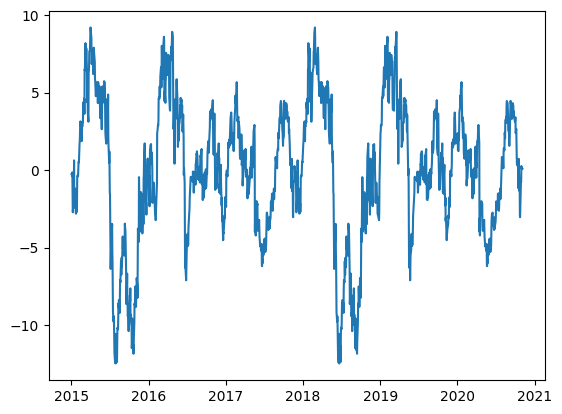

In [ ]:
#indica a sazonalidade desses dados
plt.plot(sazonal);

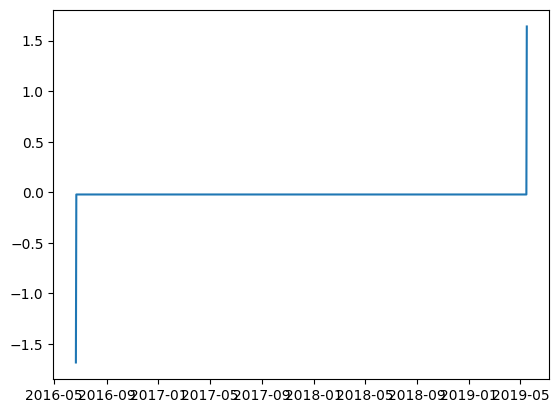

In [ ]:
#os dados q nao podem ser explicados, ou residuais
plt.plot(aleatorio);

## Previsões com ARIMA

In [ ]:
#auto-arima é o parametro que vai fazer os testes e descobrir quais sao os parametos que melhor que vao se adaptar nos dados q estamos trabalhando
modelo = auto_arima(time_series, suppress_warnings=True, error_action='ignore')

In [ ]:
# Parâmetros P, Q e D
modelo.order

(4, 1, 4)

In [ ]:
previsoes = modelo.predict(n_periods=90)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [ ]:
previsoes

1446    92.060284
1447    91.658581
1448    91.684811
1449    90.846847
1450    91.059304
          ...    
1531    90.584576
1532    90.584799
1533    90.585934
1534    90.584600
1535    90.586381
Length: 90, dtype: float64

## Gráfico das previsões

In [ ]:
len(time_series)

1446

In [ ]:
#qtde de registro q sera utilizada para o treinamento
treinamento = time_series[:1081]
treinamento.shape

(1081,)

In [ ]:
treinamento.index.min(), treinamento.index.max()

(Timestamp('2015-01-02 00:00:00'), Timestamp('2019-05-10 00:00:00'))

In [ ]:
#Base de dados de teste, em dias
teste = time_series[1081:]
teste.shape

(365,)

In [ ]:
teste.index.min(), teste.index.max()

(Timestamp('2019-05-13 00:00:00'), Timestamp('2020-11-03 00:00:00'))

In [ ]:
#treinamento de um novo modelo
modelo2 = auto_arima(treinamento, suppress_warnings=True, error_action='ignore')

In [ ]:
teste.index

DatetimeIndex(['2019-05-13', '2019-05-14', '2019-05-15', '2019-05-16',
               '2019-05-17', '2019-05-20', '2019-05-21', '2019-05-22',
               '2019-05-23', '2019-05-24',
               ...
               '2020-10-20', '2020-10-21', '2020-10-22', '2020-10-23',
               '2020-10-26', '2020-10-27', '2020-10-28', '2020-10-29',
               '2020-10-30', '2020-11-03'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)

In [ ]:
#previsoes BOV

previsoes = pd.DataFrame(modelo2.predict(n_periods=365).values, index=teste.index)
previsoes.columns = ['previsoes']
previsoes

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



,previsoes
Date,
2019-05-13,90.900022
2019-05-14,90.977381
2019-05-15,91.040707
2019-05-16,91.095342
2019-05-17,91.144594
...,...
2020-10-27,105.575508
2020-10-28,105.616004
2020-10-29,105.656500


In [ ]:
#preços reais da BOV
teste

Date
2019-05-13    88.309998
2019-05-14    88.760002
2019-05-15    87.870003
2019-05-16    86.559998
2019-05-17    86.739998
                ...    
2020-10-27    95.800003
2020-10-28    92.430000
2020-10-29    92.910004
2020-10-30    90.660004
2020-11-03    92.410004
Name: BOVA, Length: 365, dtype: float64

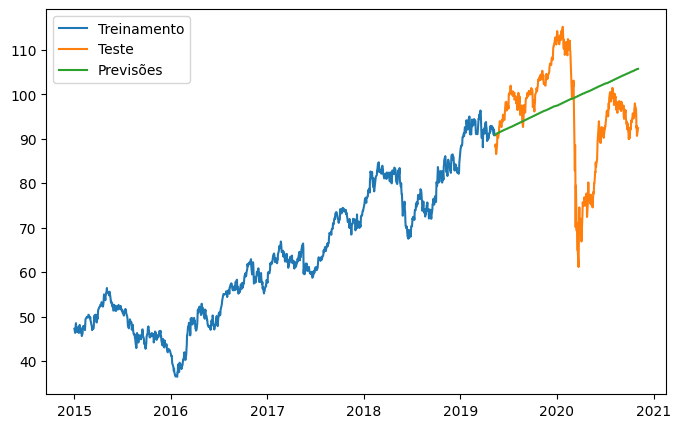

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(treinamento, label = 'Treinamento')
plt.plot(teste, label = 'Teste')
plt.plot(previsoes, label = 'Previsões')
plt.legend();

## Avaliação do ARIMA

In [ ]:
teste[0:2]

Date
2019-05-13    88.309998
2019-05-14    88.760002
Name: BOVA, dtype: float64

In [ ]:
previsoes[0:2]

,previsoes
Date,
2019-05-13,90.900022
2019-05-14,90.977381


In [ ]:
2.59 / 365

0.007095890410958904

In [ ]:
#erro medio de uma previsao nos preços das açoes do periodo
sum(abs(teste - previsoes['previsoes']) / len(teste))

10.260835835749601

In [ ]:
#erro medio de uma previsao nos preços das açoes do periodo
from sklearn.metrics import mean_absolute_error
mean_absolute_error(teste, previsoes)

10.260835835749603

# Séries temporais em bases financeiras - Facebook Prophet

## Instalação e importação das bibliotecas

In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from prophet import Prophet
import pandas as pd

## Carregamento da base de dados

In [ ]:
dataset = pd.read_csv('acoes.csv', usecols=['Date', 'BOVA'])
dataset

,Date,BOVA
0,2015-01-02,47.259998
1,2015-01-05,46.320000
2,2015-01-06,46.580002
3,2015-01-07,48.150002
4,2015-01-08,48.509998
...,...,...
1441,2020-10-27,95.800003
1442,2020-10-28,92.430000
1443,2020-10-29,92.910004
1444,2020-10-30,90.660004


In [ ]:
dataset = dataset[['Date', 'BOVA']].rename(columns = {'Date': 'ds', 'BOVA': 'y'})
dataset

,ds,y
0,2015-01-02,47.259998
1,2015-01-05,46.320000
2,2015-01-06,46.580002
3,2015-01-07,48.150002
4,2015-01-08,48.509998
...,...,...
1441,2020-10-27,95.800003
1442,2020-10-28,92.430000
1443,2020-10-29,92.910004
1444,2020-10-30,90.660004


## Construção do modelo e previsões

In [ ]:
modelo = Prophet()
modelo.fit(dataset)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp66skgif3/uh_rqqbh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp66skgif3/9eh9htxr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20561', 'data', 'file=/tmp/tmp66skgif3/uh_rqqbh.json', 'init=/tmp/tmp66skgif3/9eh9htxr.json', 'output', 'file=/tmp/tmp66skgif3/prophet_modelhqqbjnox/prophet_model-20230614223154.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:31:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:31:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
futuro = modelo.make_future_dataframe(periods=90)
previsoes = modelo.predict(futuro)

In [ ]:
previsoes.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-02,47.895562,42.688146,56.603994,47.895562,47.895562,1.778277,1.778277,1.778277,0.219452,0.219452,0.219452,1.558825,1.558825,1.558825,0.0,0.0,0.0,49.673839
1,2015-01-05,47.970887,42.961180,57.298537,47.970887,47.970887,2.170773,2.170773,2.170773,0.162045,0.162045,0.162045,2.008728,2.008728,2.008728,0.0,0.0,0.0,50.141660
2,2015-01-06,47.995995,43.309275,57.210466,47.995995,47.995995,2.368687,2.368687,2.368687,0.211679,0.211679,0.211679,2.157008,2.157008,2.157008,0.0,0.0,0.0,50.364682
3,2015-01-07,48.021104,43.442868,57.495878,48.021104,48.021104,2.484821,2.484821,2.484821,0.183834,0.183834,0.183834,2.300987,2.300987,2.300987,0.0,0.0,0.0,50.505925
4,2015-01-08,48.046212,43.625328,57.651896,48.046212,48.046212,2.655949,2.655949,2.655949,0.217181,0.217181,0.217181,2.438768,2.438768,2.438768,0.0,0.0,0.0,50.702161


In [ ]:
len(dataset), len(previsoes)

(1446, 1536)

In [ ]:
len(previsoes) - len(dataset)

90

In [ ]:
previsoes.tail(90)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1446,2020-11-04,90.302689,85.805830,99.174527,90.302689,90.302689,2.214678,2.214678,2.214678,0.183834,0.183834,0.183834,2.030844,2.030844,2.030844,0.0,0.0,0.0,92.517367
1447,2020-11-05,90.280096,85.523754,99.528926,90.280096,90.280096,2.112273,2.112273,2.112273,0.217181,0.217181,0.217181,1.895092,1.895092,1.895092,0.0,0.0,0.0,92.392369
1448,2020-11-06,90.257504,85.098817,99.350950,90.257504,90.257504,1.982268,1.982268,1.982268,0.219452,0.219452,0.219452,1.762816,1.762816,1.762816,0.0,0.0,0.0,92.239771
1449,2020-11-07,90.234911,84.348166,98.473311,90.234911,90.234911,1.139270,1.139270,1.139270,-0.497095,-0.497095,-0.497095,1.636366,1.636366,1.636366,0.0,0.0,0.0,91.374181
1450,2020-11-08,90.212318,84.603211,98.102389,90.212318,90.212318,1.020806,1.020806,1.020806,-0.497096,-0.497096,-0.497096,1.517902,1.517902,1.517902,0.0,0.0,0.0,91.233124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,2021-01-28,88.382308,84.882153,99.033534,87.468413,89.156291,3.338295,3.338295,3.338295,0.217181,0.217181,0.217181,3.121114,3.121114,3.121114,0.0,0.0,0.0,91.720603
1532,2021-01-29,88.359715,84.697490,98.455451,87.428843,89.150955,3.335109,3.335109,3.335109,0.219452,0.219452,0.219452,3.115657,3.115657,3.115657,0.0,0.0,0.0,91.694824
1533,2021-01-30,88.337122,83.788545,97.851959,87.392583,89.141748,2.619501,2.619501,2.619501,-0.497095,-0.497095,-0.497095,3.116596,3.116596,3.116596,0.0,0.0,0.0,90.956623
1534,2021-01-31,88.314530,83.481867,97.482113,87.355706,89.130055,2.627608,2.627608,2.627608,-0.497096,-0.497096,-0.497096,3.124704,3.124704,3.124704,0.0,0.0,0.0,90.942138


## Gráfico das previsões

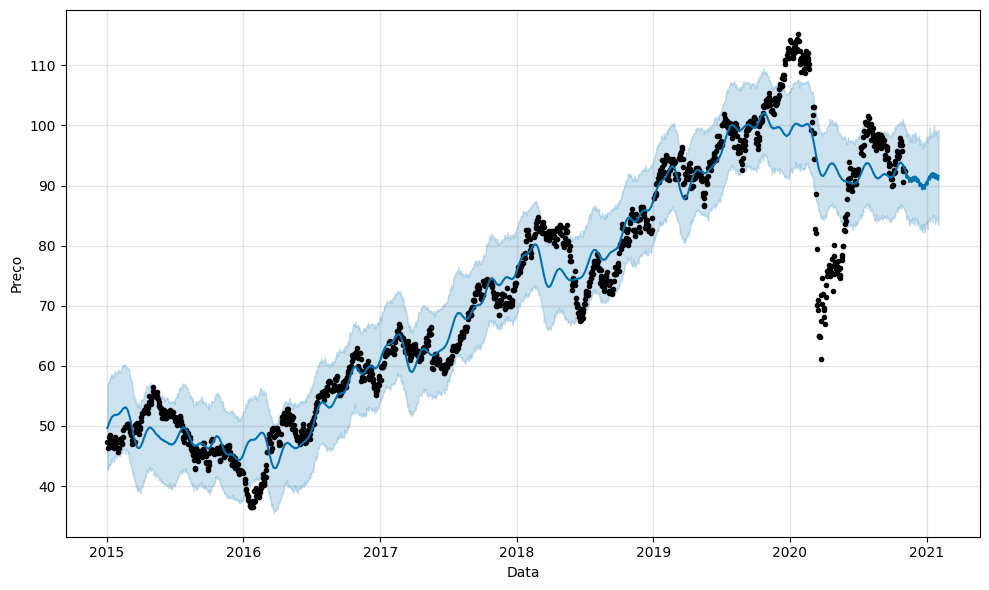

In [ ]:
#pontos = dados reais
#linha = previsao
modelo.plot(previsoes, xlabel = 'Data', ylabel = 'Preço');

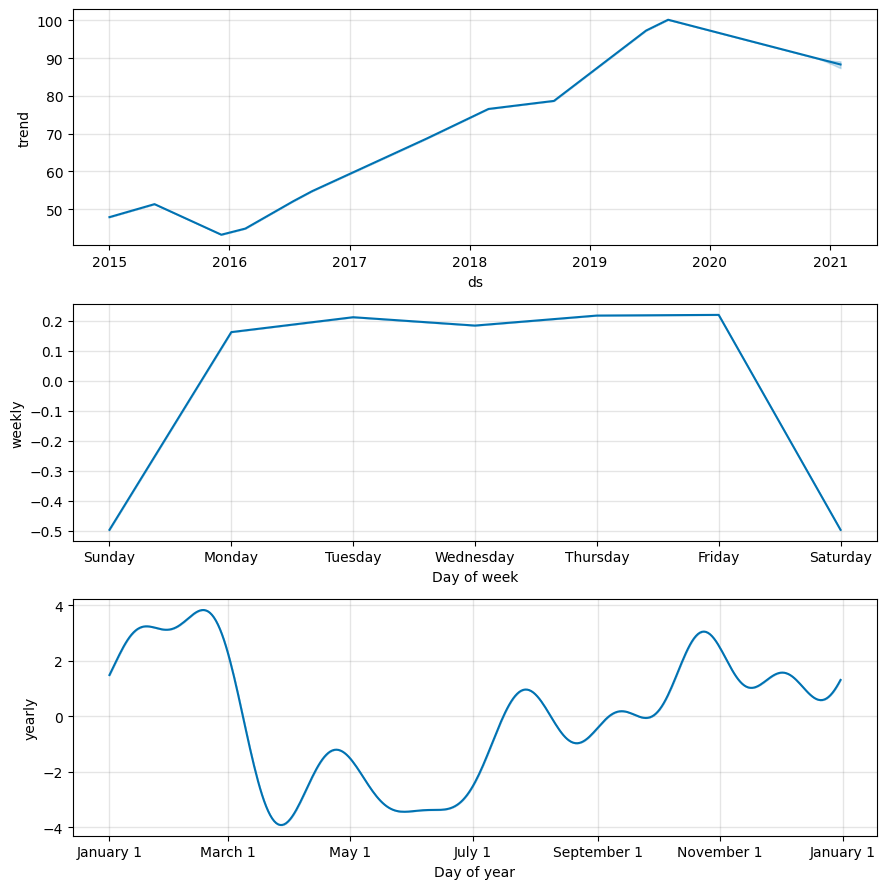

In [ ]:
modelo.plot_components(previsoes);

In [ ]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 93.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 6.0 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for o

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly



In [ ]:
plot_plotly(modelo, previsoes)

In [ ]:
plot_components_plotly(modelo, previsoes)

## Avaliação

In [ ]:
teste.shape

(365,)

In [ ]:
teste.tail()

Date
2020-10-27    95.800003
2020-10-28    92.430000
2020-10-29    92.910004
2020-10-30    90.660004
2020-11-03    92.410004
Name: BOVA, dtype: float64

In [ ]:
pred = modelo.make_future_dataframe(periods=0)
previsoes = modelo.predict(pred)

In [ ]:
previsoes.shape

(1446, 19)

In [ ]:
previsoes.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1441,2020-10-27,90.483431,86.523176,100.939421,90.483431,90.483431,3.150326,3.150326,3.150326,0.211679,0.211679,0.211679,2.938647,2.938647,2.938647,0.0,0.0,0.0,93.633757
1442,2020-10-28,90.460838,86.871398,100.723708,90.460838,90.460838,3.049000,3.049000,3.049000,0.183834,0.183834,0.183834,2.865166,2.865166,2.865166,0.0,0.0,0.0,93.509838
1443,2020-10-29,90.438245,85.944188,100.056920,90.438245,90.438245,2.993038,2.993038,2.993038,0.217181,0.217181,0.217181,2.775857,2.775857,2.775857,0.0,0.0,0.0,93.431283
1444,2020-10-30,90.415653,85.809842,100.021044,90.415653,90.415653,2.892132,2.892132,2.892132,0.219452,0.219452,0.219452,2.672680,2.672680,2.672680,0.0,0.0,0.0,93.307784
1445,2020-11-03,90.325282,85.752151,100.058752,90.325282,90.325282,2.379262,2.379262,2.379262,0.211679,0.211679,0.211679,2.167583,2.167583,2.167583,0.0,0.0,0.0,92.704544


In [ ]:
previsoes = previsoes['yhat'].tail(365)

In [ ]:
previsoes

1081    92.094476
1082    92.115743
1083    92.065677
1084    92.083529
1085    92.077480
          ...    
1441    93.633757
1442    93.509838
1443    93.431283
1444    93.307784
1445    92.704544
Name: yhat, Length: 365, dtype: float64

In [ ]:
mean_absolute_error(teste, previsoes)

6.297111889360018